In [2]:

# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from sklearn.model_selection import StratifiedKFold
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# define 10-fold cross validation test harness
folds=5
epochs=150
kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=seed)
cvscores = []
i=0
history2=[]
for train, test in kfold.split(X, Y):
  # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
    model.add(Dense(8, init='uniform', activation='relu'))
    model.add(Dense(8, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
# Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
    history=model.fit(X[train], Y[train], nb_epoch=epochs, batch_size=10, verbose=0)
    try:
        history2.append(history)
    except:
        print("Oops")
    # evaluate the model
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
print(history)

Using Theano backend.
Using gpu device 0: GeForce GTX 860M (CNMeM is disabled, cuDNN 5103)
/home/artir/anaconda3/lib/python3.5/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


acc: 74.03%
acc: 76.62%
acc: 75.32%
acc: 74.51%
acc: 73.86%
74.87% (+/- 1.01%)


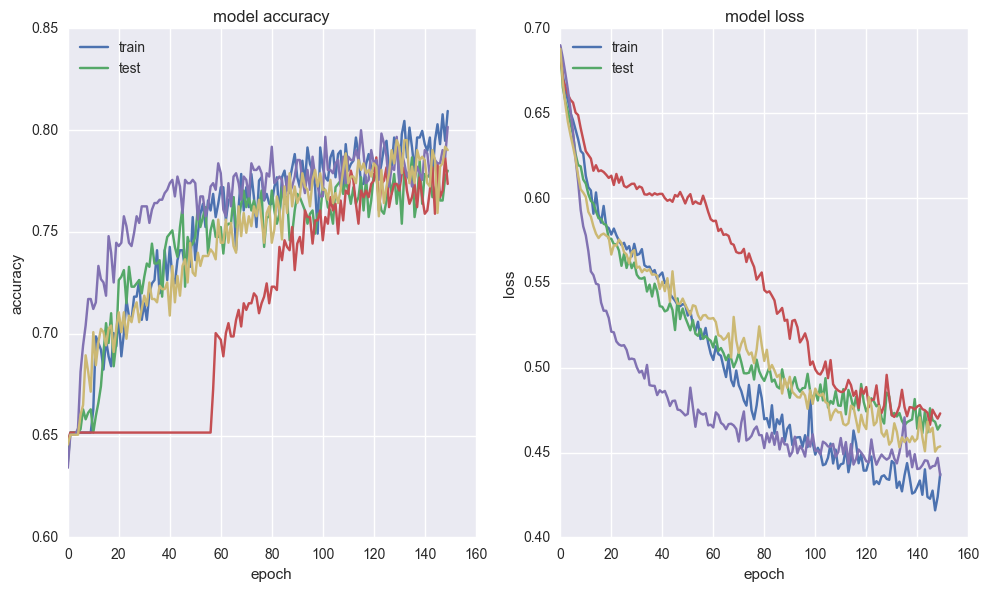

In [10]:
# summarize history for accuracy
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
for history in history2:
    
    plt.plot(history.history['acc'])
   # plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
for history in history2:
    # summarize history for loss
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()